In [3]:
from torchview import draw_graph
from torchinfo import summary
from socal import TwoInputsNet, RealEstateCombinedDataset, preprocessing
import albumentations as A
from torch.utils.data import Dataset, DataLoader,random_split
from albumentations.pytorch import ToTensorV2
import einops
import matplotlib.pyplot as plt
import torchvision
%matplotlib inline

import seaborn as sns




In [11]:
df = preprocessing('../dataset/socal/socal2.csv')

transform= A.Compose([
        A.Resize(128, 128),
        # A.Normalize(),
        ToTensorV2()
    ])
house_dataset = RealEstateCombinedDataset(df=df,
                                              image_dir='../dataset/socal/socal2/socal_pics',
                                              transform=transform)

preprocessing
Index(['image_id', 'street', 'citi', 'n_citi', 'bed', 'bath', 'sqft', 'price'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  15474 non-null  int64  
 1   street    15474 non-null  object 
 2   citi      15474 non-null  object 
 3   n_citi    15474 non-null  int64  
 4   bed       15474 non-null  int64  
 5   bath      15474 non-null  float64
 6   sqft      15474 non-null  int64  
 7   price     15474 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 967.2+ KB
None
   image_id                 street             citi  n_citi  bed  bath  sqft  \
0         0  1317 Van Buren Avenue  Salton City, CA     317    3   2.0  1560   
1         1         124 C Street W      Brawley, CA      48    3   2.0   713   
2         2        2304 Clark Road     Imperial, CA     152    3   1.0   800   
3  

In [10]:
model = TwoInputsNet(df=df,image_dir='../dataset/socal/socal2/socal_pics',transform=transform)

# get_summary(model,house_dataset,batch_size=4)
first_batch = next(iter(house_dataset))
house_dataset_dataloader = DataLoader(house_dataset, batch_size=32, shuffle=True)
image,house_features,y =  next(iter(house_dataset_dataloader))
print(image.shape)
# A = einops.rearrange(image, 'b c h w ->  (b) c h w')
# print(A.shape)
stats = summary(model, input_data=(image,house_features),verbose=1)
print(stats)

torch.Size([32, 3, 128, 128])


RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: [Conv2d: 1, Conv2d: 1, Conv2d: 1, Linear: 1]

In [8]:
model_graph = draw_graph(model,input_data=(image,house_features)) 
model_graph.visual_graph

RuntimeError: Failed to run torchgraph see error message

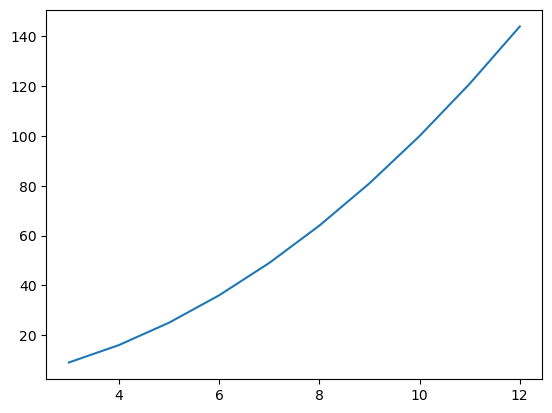

In [7]:
x=[3,4,5,6,7,8,9,10,11,12]
y= [9,16,25,36,49,64,81,100,121,144]

plt.plot(x,y)
plt.show()

In [8]:
batch

NameError: name 'batch' is not defined

torch.Size([3, 1042, 522])


(-0.5, 521.5, 1041.5, -0.5)

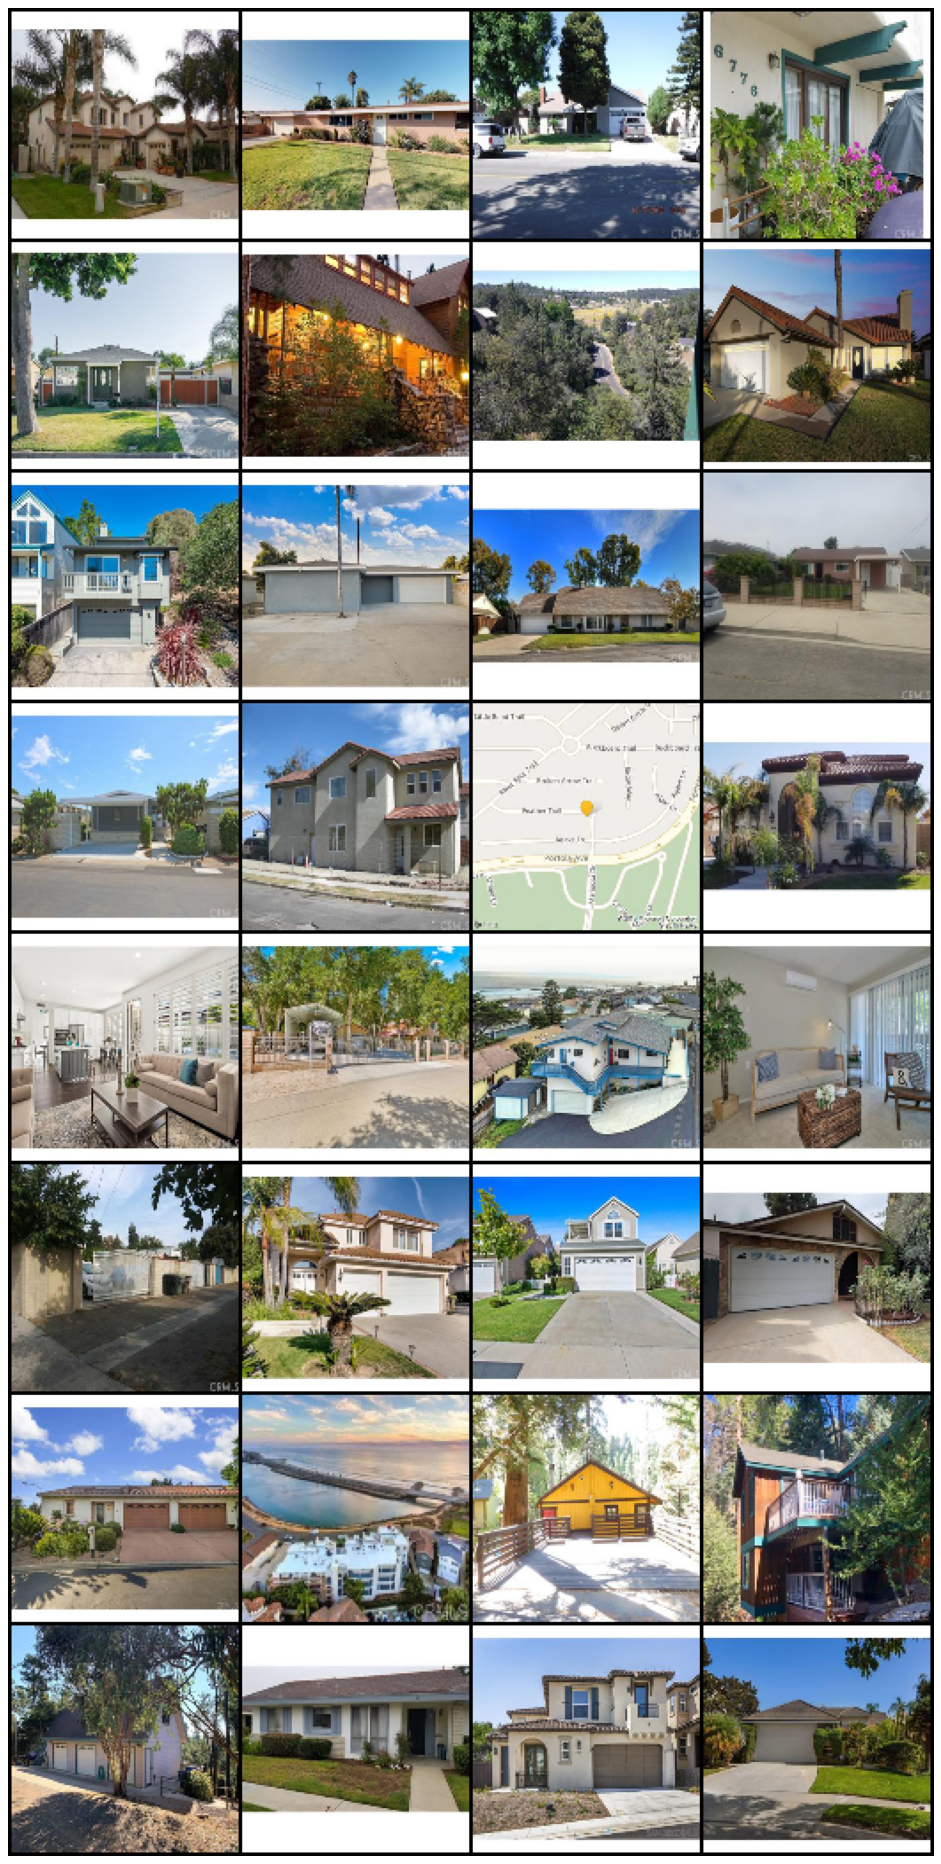

In [9]:
# print(A.shape)
# I = einops.rearrange(A, 'b c h w -> b h w c')
# I = A
# print((I.shape))
from matplotlib.pyplot import figure
figure(figsize=(30, 30), dpi=80)

grid = torchvision.utils.make_grid(image, normalize =  True, nrow=4)
print(grid.shape)
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
# plt.title(y.numpy())

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

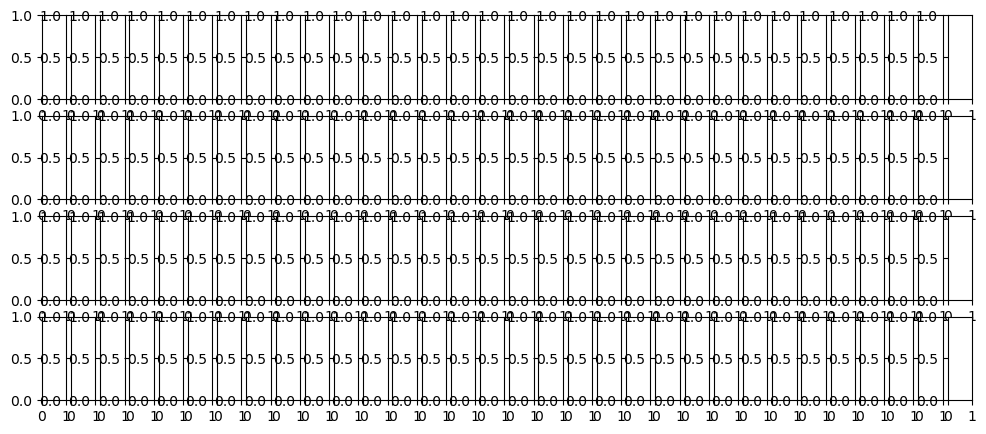

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the dataloader
images, features, labels = next(iter(house_dataset_dataloader))

# Convert the images and labels to numpy arrays
images = images.numpy()
labels = labels.numpy()
images = images / 255

# Create a grid of subplots
fig, axs = plt.subplots(4, len(images), figsize=(12,5))

# Iterate over the images and labels
for i, (img, label) in enumerate(zip(images, labels)):
    axs[i].imshow(np.transpose(img, (1, 2, 0)))
    axs[i].set_title(label)
    axs[i].axis('off')

# Show the plot
plt.show()


In [13]:
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    plt.imshow(images[idx])
    # ax.set_title(classes[labels[idx]])

ValueError: Number of columns must be a positive integer, not 10.0

<Figure size 2500x400 with 0 Axes>